<a href="https://colab.research.google.com/github/advik-7/Data-Preprocessing-/blob/main/practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello")

hello


In [2]:
import zipfile
with zipfile.ZipFile("/content/archive (3).zip", 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/content/Brazilian-fire-dataset.csv")

In [5]:
df

,Year,State,Month,Number of Fires,Date Reported
0,1998,Acre,January,0.0,1/01/1998
1,1999,Acre,January,0.0,1/01/1999
2,2000,Acre,January,0.0,1/01/2000
3,2001,Acre,January,0.0,1/01/2001
4,2002,Acre,January,0.0,1/01/2002
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,1/01/2012
6450,2013,Tocantins,December,85.0,1/01/2013
6451,2014,Tocantins,December,223.0,1/01/2014
6452,2015,Tocantins,December,373.0,1/01/2015


Change the order of columns in dataset

In [7]:
order_col=['Date Reported','Year','Month','State','Number of Fires']
df=df[order_col]
df.head(10)

,Date Reported,Year,Month,State,Number of Fires
0,1/01/1998,1998,January,Acre,0.0
1,1/01/1999,1999,January,Acre,0.0
2,1/01/2000,2000,January,Acre,0.0
3,1/01/2001,2001,January,Acre,0.0
4,1/01/2002,2002,January,Acre,0.0
5,1/01/2003,2003,January,Acre,10.0
6,1/01/2004,2004,January,Acre,0.0
7,1/01/2005,2005,January,Acre,12.0
8,1/01/2006,2006,January,Acre,4.0
9,1/01/2007,2007,January,Acre,0.0


finding number of count of a column

In [11]:
df['State'].value_counts()

,count
State,
Alagoas,240
Acre,239
Paraíba,239
Sergipe,239
São Paulo,239
Santa Catarina,239
Roraima,239
Rondônia,239
Rio Grande do Sul,239


In [14]:
df.State.nunique()

27

In [15]:
df.describe(include='all')

,Date Reported,Year,Month,State,Number of Fires
count,6454,6454.000000,6454,6454,6454.000000
unique,20,NaN,12,27,NaN
top,1/01/1998,NaN,January,Alagoas,NaN
freq,324,NaN,541,240,NaN
mean,NaN,2007.461729,NaN,NaN,108.293163
std,NaN,5.746654,NaN,NaN,190.812242
min,NaN,1998.000000,NaN,NaN,0.000000
25%,NaN,2002.000000,NaN,NaN,3.000000
50%,NaN,2007.000000,NaN,NaN,24.000000
75%,NaN,2012.000000,NaN,NaN,113.000000


finding other values of max value

In [20]:
max_fire=df['Number of Fires'].max()
df[df['Number of Fires']==max_fire]

,Date Reported,Year,Month,State,Number of Fires
888,1/01/2008,2008,September,Amazonas,998.0


combining 2 colums

In [26]:
df_grp_statefire=df.groupby(['State']).agg({'Number of Fires':np.sum})
df_grp_statefire

<ipython-input-26-743d7a0f8c7e>:1: FutureWarning: The provided callable <function sum at 0x7915ab502e60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_grp_statefire=df.groupby(['State']).agg({'Number of Fires':np.sum})


,Number of Fires
State,
Acre,18464.030
Alagoas,4644.000
Amapá,21831.576
Amazonas,30650.129
Bahia,44746.226
Ceará,30428.063
Distrito Federal,3561.000
Espírito Santo,6546.000
Goiás,37695.520


In [28]:
df_grp_monthfire=df.groupby(['Month']).agg({'Number of Fires':np.sum})
df_grp_monthfire

<ipython-input-28-2fffd5db2a07>:1: FutureWarning: The provided callable <function sum at 0x7915ab502e60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_grp_monthfire=df.groupby(['Month']).agg({'Number of Fires':np.sum})


,Number of Fires
Month,
April,28188.770
August,88050.435
December,57535.480
February,30848.050
January,47747.844
July,92326.113
June,56010.675
March,30717.405
May,34731.363


In [31]:
df_grp_statefire.min()

,0
Number of Fires,3237.0


In [33]:
df_grp_statefire.idxmax() #index value for the max value , idxmin = index of min

,0
Number of Fires,São Paulo


In [42]:
import matplotlib.pyplot as plt

In [36]:
import seaborn as sns

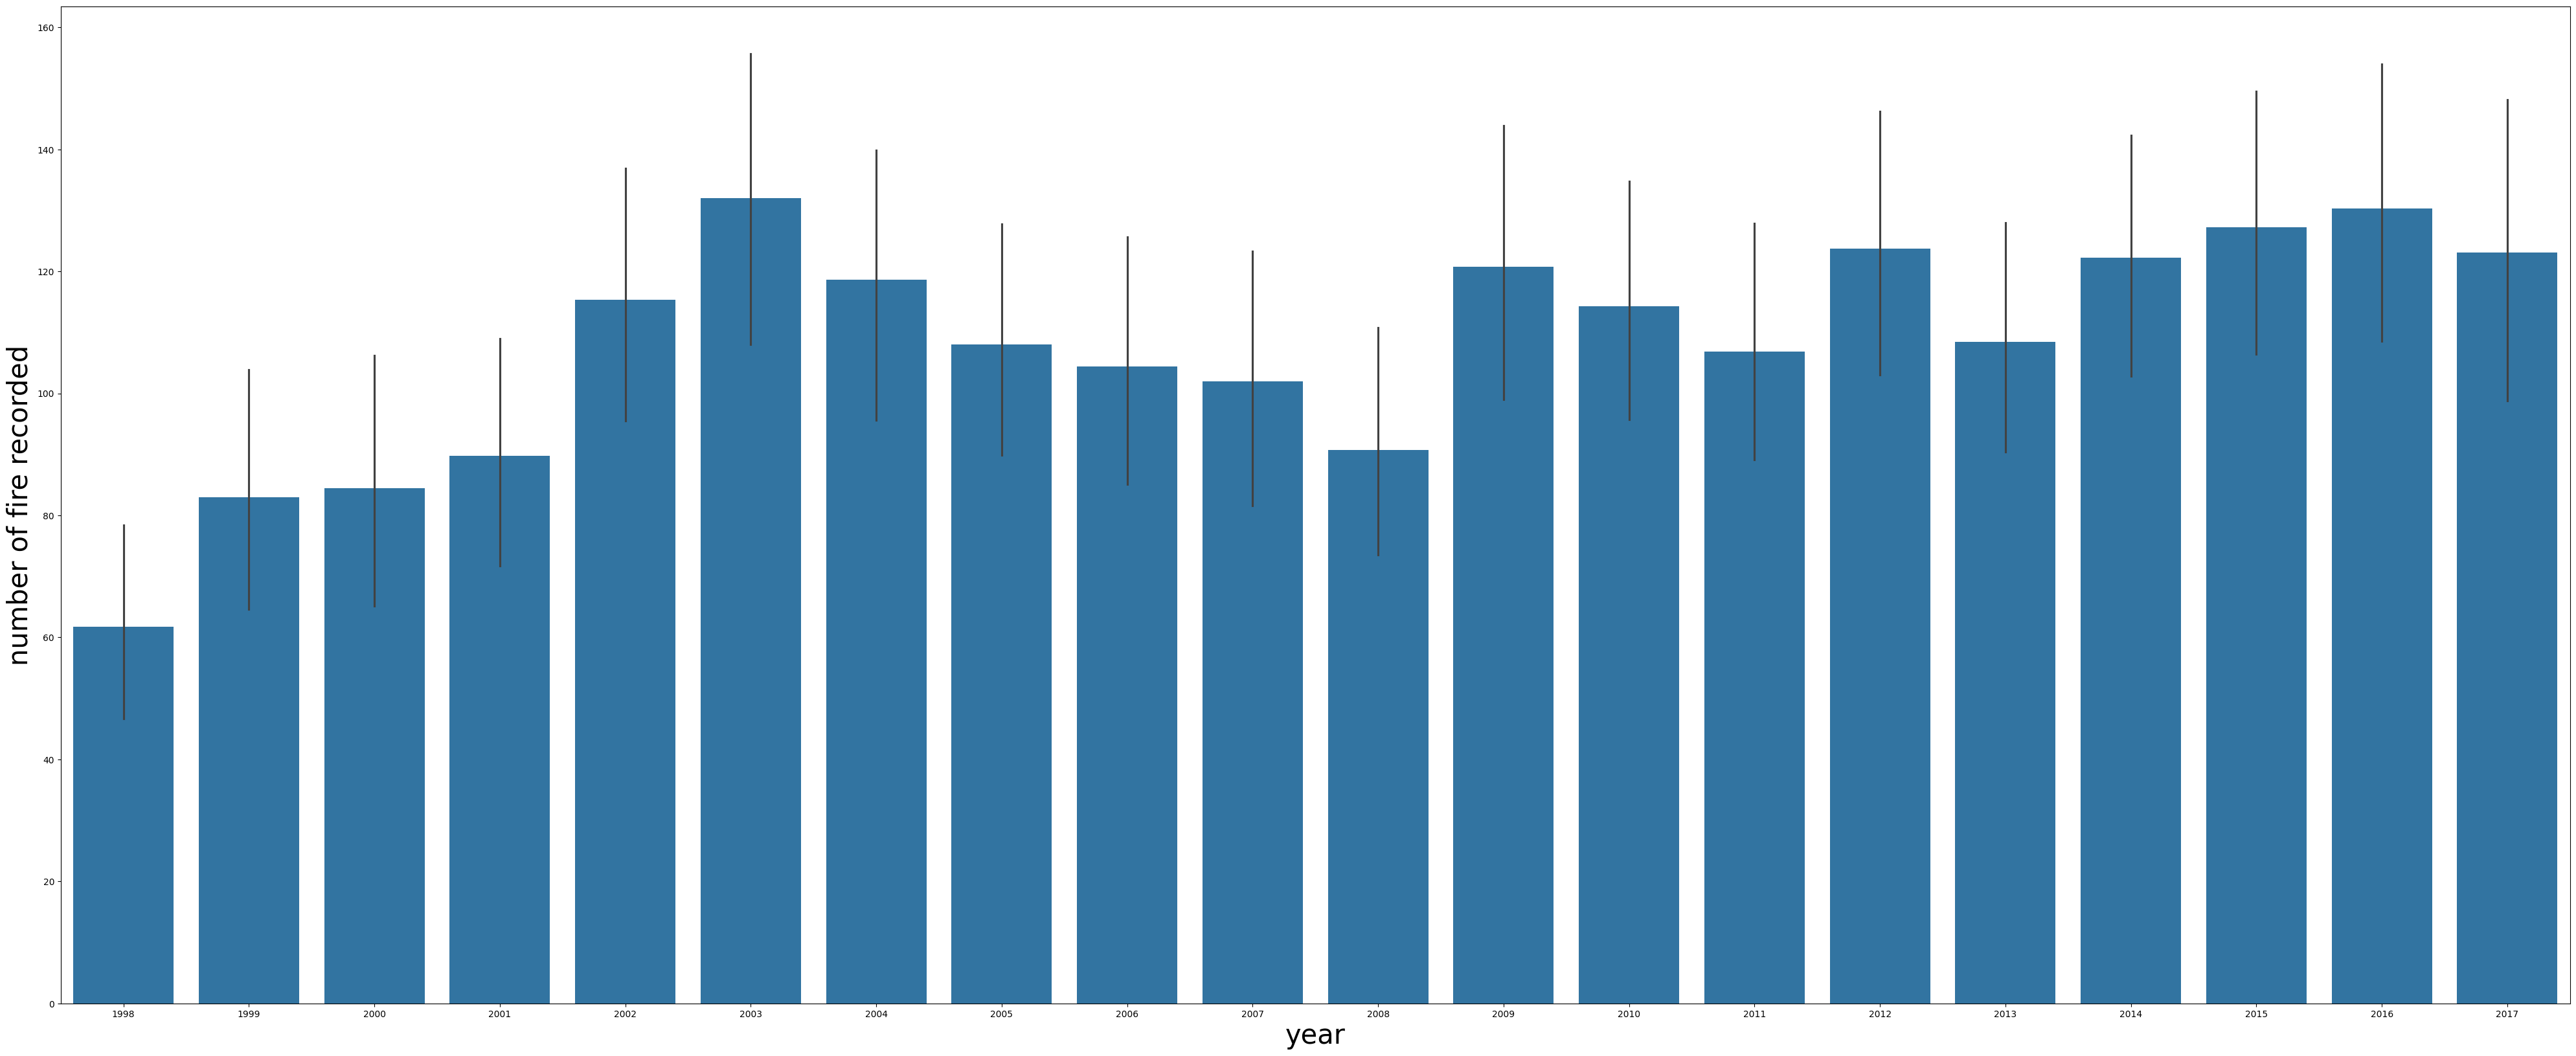

In [43]:
fig=plt.figure(figsize=(50,20))
sns.barplot(x='Year',y='Number of Fires',data=df)
plt.xlabel('year',fontsize=30)
plt.ylabel('number of fire recorded',fontsize=30)
plt.show()

In [49]:
df_grp_statefire.head()

,Number of Fires
State,
Acre,18464.030
Alagoas,4644.000
Amapá,21831.576
Amazonas,30650.129
Bahia,44746.226


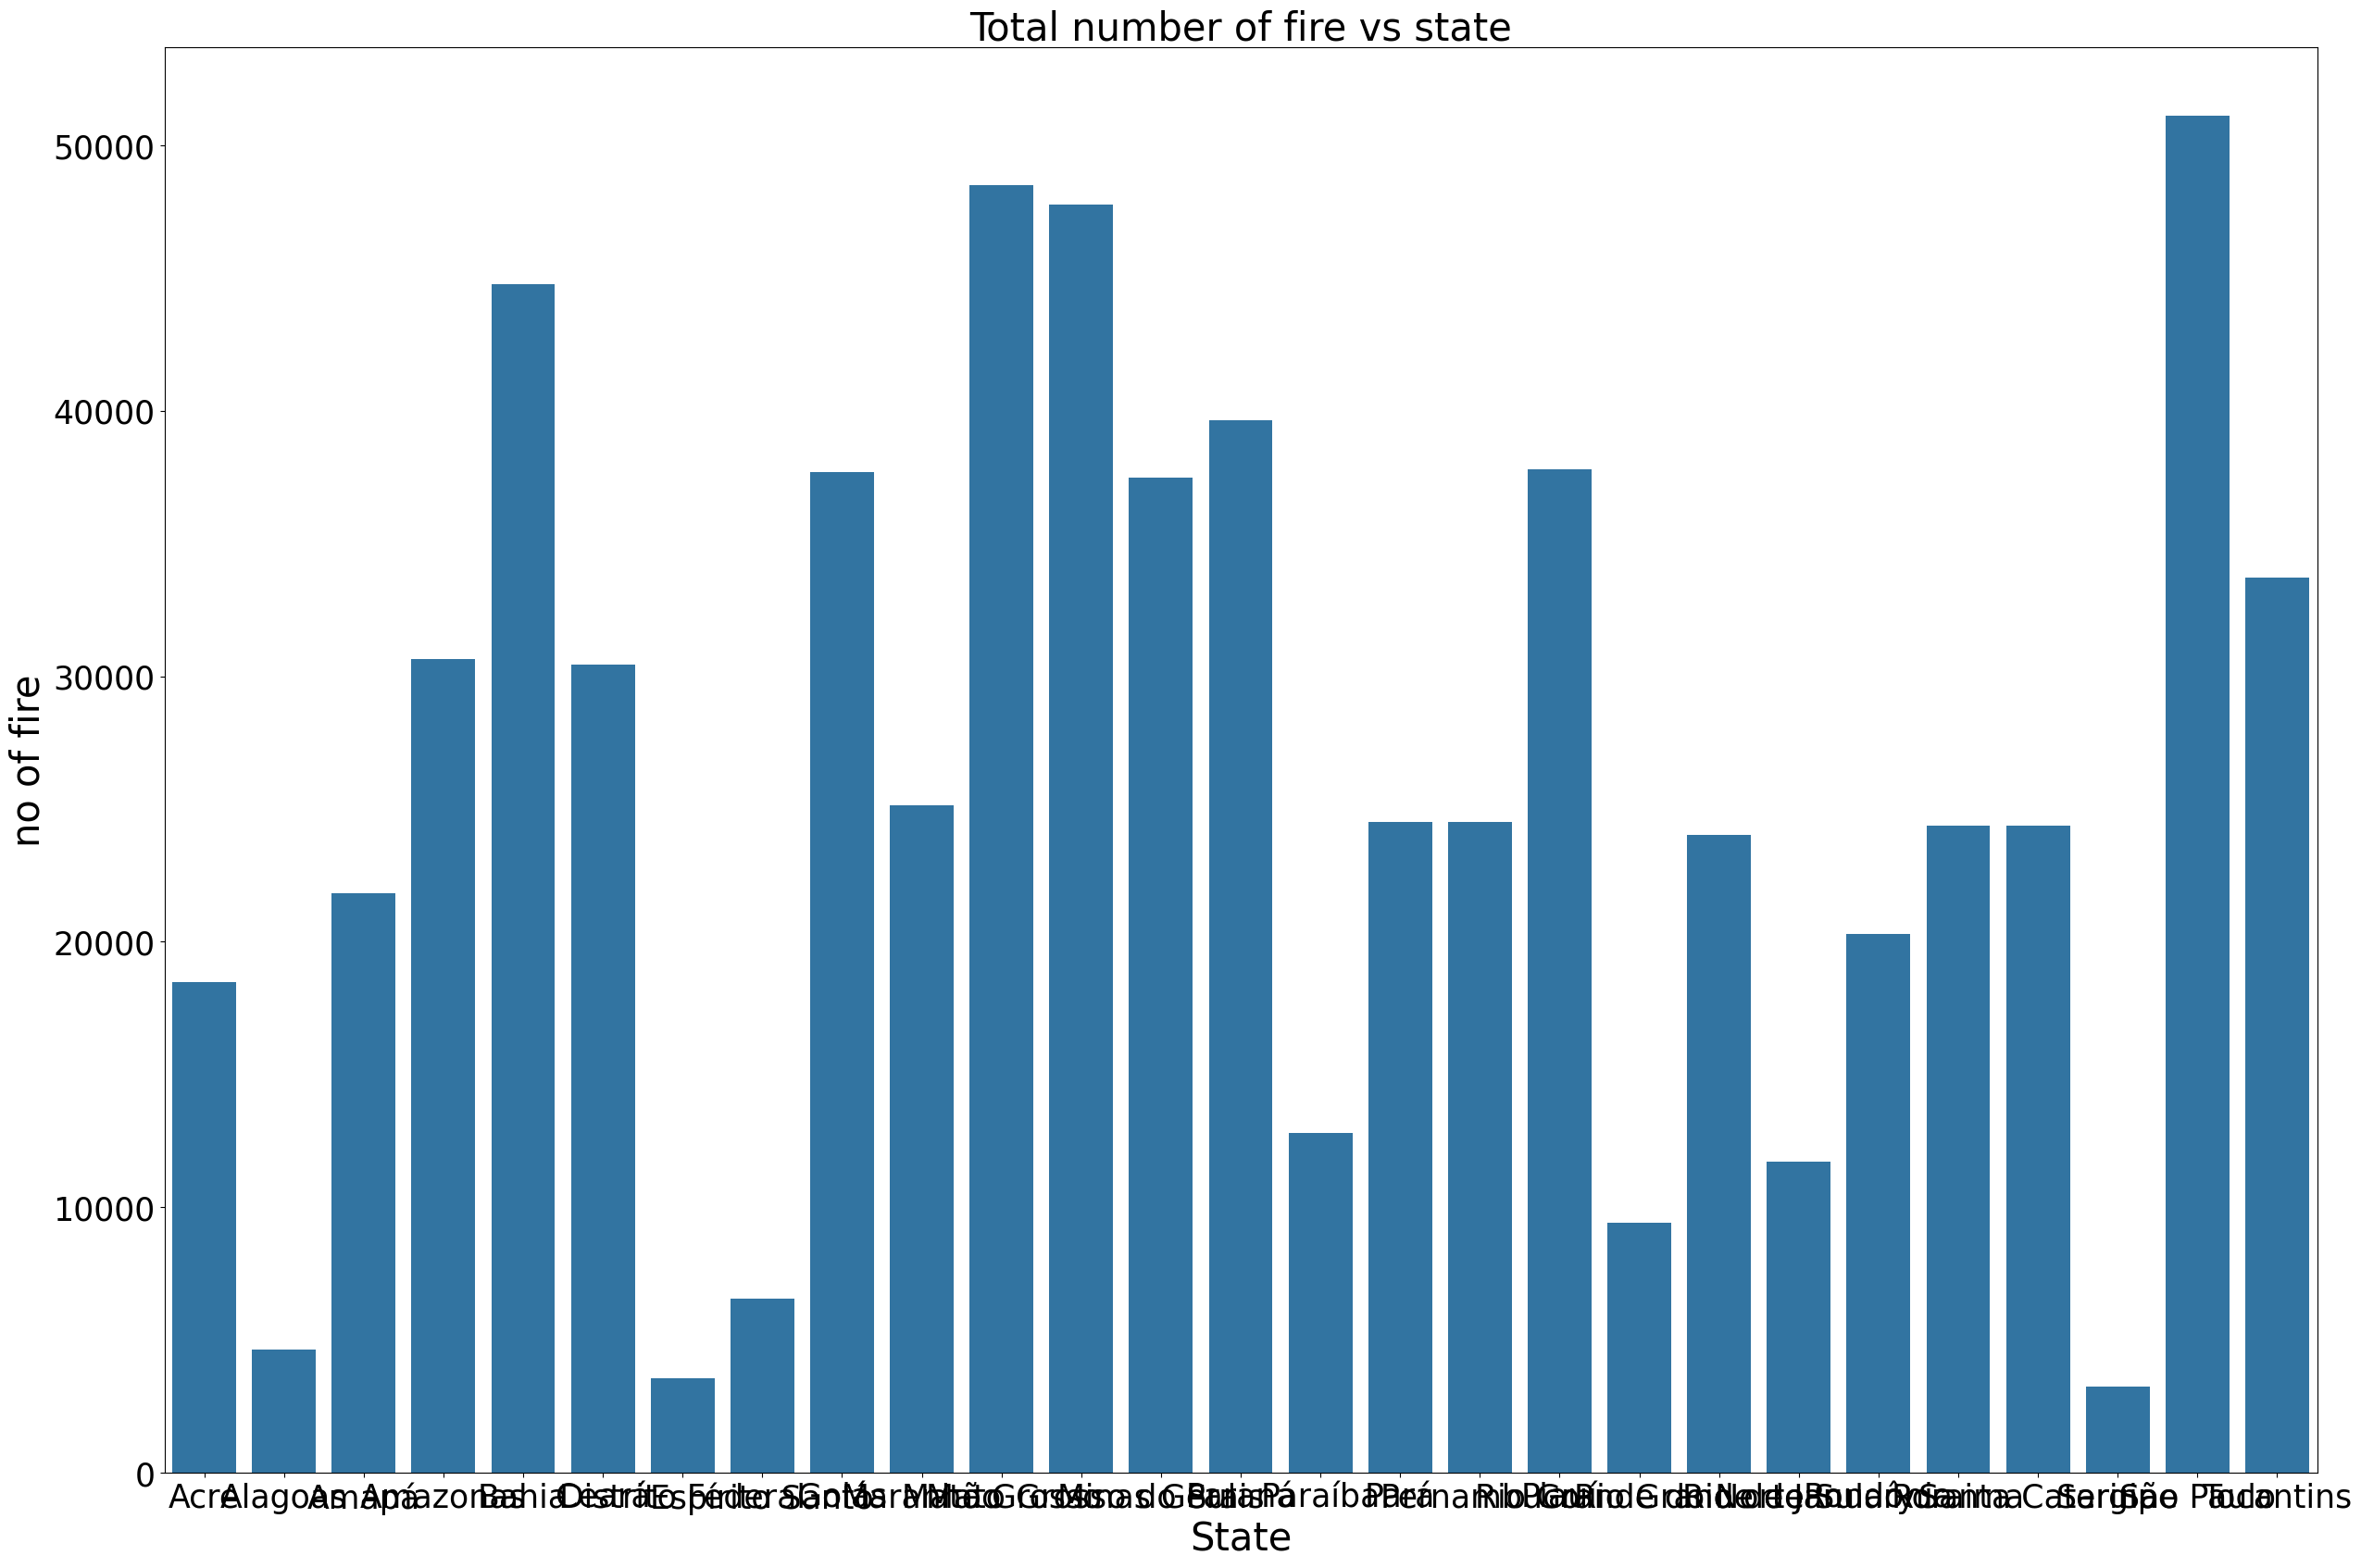

In [53]:
fig=plt.figure(figsize=(30,20))
sns.barplot(x=df_grp_statefire.index,y='Number of Fires',data=df_grp_statefire)
plt.xlabel("State",fontsize=30)
plt.ylabel("no of fire",fontsize=30)
plt.title(label='Total number of fire vs state',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [55]:
import plotly.express as px
fig=px.bar(x=df_grp_statefire.index,y=df_grp_statefire['Number of Fires'],labels=dict(x="months",y="number of fires"))
fig.show()

In [57]:
df.isnull().sum().sum()

0